---

## Lab 5: Predicting Customer Churn in Banking

<div>
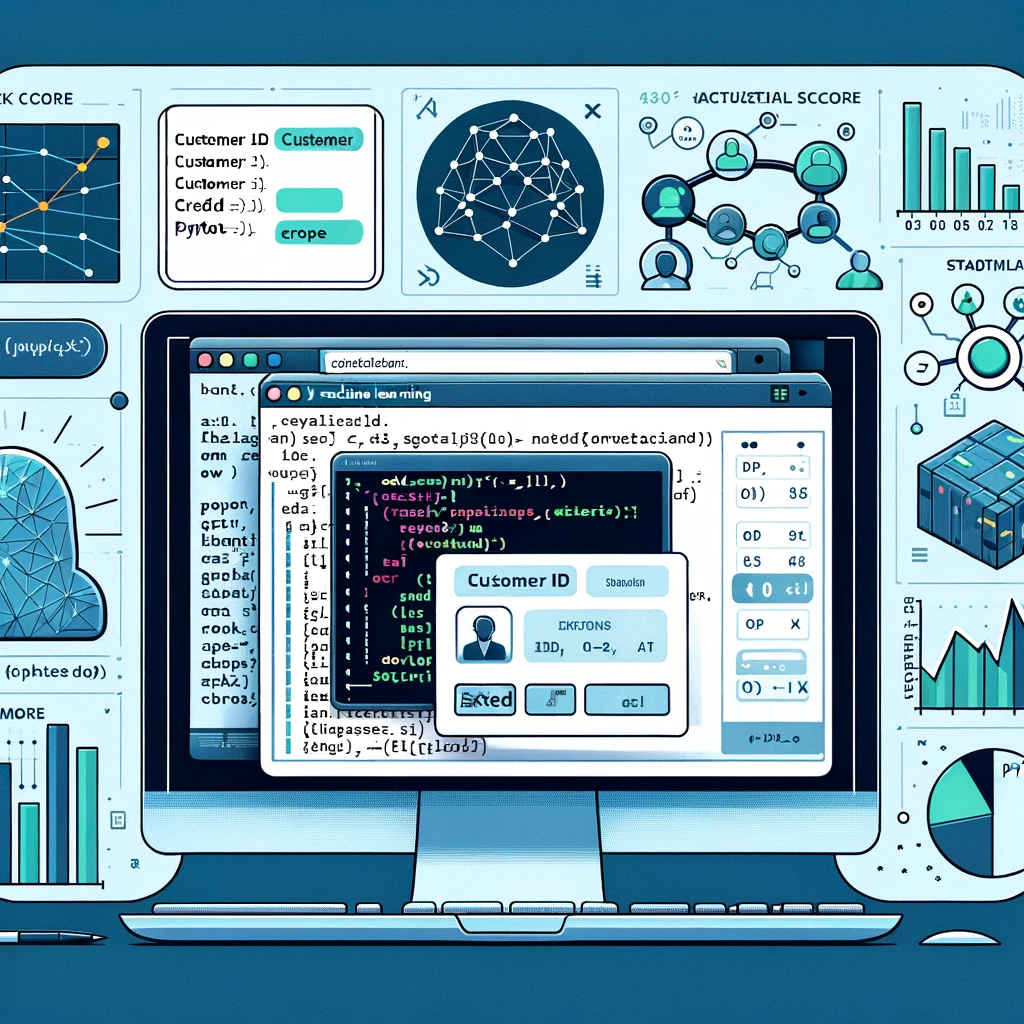
</div>




### Objective
Develop a machine learning model to predict whether a bank customer will churn based on their profile and banking activity.

### Dataset Description
The dataset contains details of bank customers along with whether they have churned. Each record includes the following attributes:

- **Customer ID**: A unique identifier for each customer.
- **Surname**: The customer's surname.
- **Credit Score**: A numerical value representing the customer's creditworthiness.
- **Geography**: The customer's country (France, Spain, or Germany).
- **Gender**: The customer's gender (Male or Female).
- **Age**: The customer's age.
- **Tenure**: How long the customer has been with the bank (in years).
- **Balance**: The amount of money available in the customer's bank account.
- **NumOfProducts**: How many banking products the customer uses.
- **HasCrCard**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **IsActiveMember**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Whether the customer has churned (1 = Yes, 0 = No).

### Tasks

1. **Data Preprocessing**: Clean the data if necessary and perform any required transformations.
2. **Exploratory Data Analysis**: Provide a statistical summary of the variables and visualize the relationships between features.
3. **Feature Engineering**: Generate new features if necessary and select appropriate features for building the model.
4. **Model Building**: Train at least two different classifiers to predict customer churn.
5. **Model Evaluation**: Evaluate your models using accuracy, recall and F1-score.
6. **Model Selection**: Compare the performance of the models and select the best one based on the evaluation metrics.

### Deliverables
Submit a Jupyter Notebook containing all the steps from data preprocessing to model evaluation and selection and **csv** file with predictions on test data. Include comments and explanations of your code and decisions.

---

This exercise encourages hands-on practice with the full data science process from data cleaning to model evaluation, using a real-world dataset.

In [43]:
#IMPORTING EVERYTHINK I NEED
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#READING CSV TRAIN FILE BY USING PANDAS 
df = pd.read_csv('train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131996,131996,15679968,Kennedy,581,Spain,Male,33.0,1,77253.22,2,1.0,0.0,194239.63,0
131997,131997,15762984,Mironova,545,Spain,Female,38.0,9,0.00,1,1.0,0.0,97633.93,0
131998,131998,15646936,Nwachukwu,598,Germany,Male,45.0,8,132932.11,1,0.0,1.0,142839.13,1
131999,131999,15781598,Ukaegbunam,833,France,Male,32.0,2,124545.68,1,1.0,1.0,50267.88,0


## 1. **Data Preprocessing**: Clean the data if necessary and perform any required transformations.

In [44]:
##USING .INFO() TO LOOK TYPE OF COLUMNS TO SORT THEM BY NUMERICAL AND CATEGORICAL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132001 entries, 0 to 132000
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               132001 non-null  int64  
 1   CustomerId       132001 non-null  int64  
 2   Surname          132001 non-null  object 
 3   CreditScore      132001 non-null  int64  
 4   Geography        132001 non-null  object 
 5   Gender           132001 non-null  object 
 6   Age              132001 non-null  float64
 7   Tenure           132001 non-null  int64  
 8   Balance          132001 non-null  float64
 9   NumOfProducts    132001 non-null  int64  
 10  HasCrCard        132001 non-null  float64
 11  IsActiveMember   132001 non-null  float64
 12  EstimatedSalary  132001 non-null  float64
 13  Exited           132001 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 14.1+ MB


In [45]:
##FINALY MAKING LISTS OF COLUMNS THAT I DONT NEED AND THOSE WHO NUMERICAL AND CATEGORICAL,
##MAKEING ALL OF THESE TO PUT IN PIPLINE FUNCTION SO IT WILL CORRECT MY DATA ADN MAKE 4EXAMPLE GETDUMMIES AND FILLMISSING FALUE
df = df.drop(columns = ['id','CustomerId','Surname','Geography'])
numerical_cols=['CreditScore','Age','Balance','EstimatedSalary']
categorical_cols=['Gender','HasCrCard','IsActiveMember','Tenure','NumOfProducts']

In [46]:
##FUNCTION
def fill_missing_values(df: pd.DataFrame, strategy: str ='mean') -> pd.DataFrame:
    """Заполнение пустых значений указанными стратегиями"""
    df = df.copy()
    fill_value = 0
    for column in df.columns:
        if strategy == 'mean':
            fill_value = df[column].mean()
        elif strategy == 'median':
            fill_value = df[column].median()
        elif strategy == 'mode':
            fill_value = df[column].mode()[0]
        df[column].fillna( value = fill_value, inplace=True )
    return df
##ENCODE CATEGORICAL FEATURES
def one_hot_encoder(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Категорийные данные в численные"""
    df = df.copy()
    df_num = df.drop(columns = columns)
    df = df[columns].copy()
    df_prep = pd.DataFrame()
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) <= 2:
            df_prep[column] = df[column]
            for i in range(len(unique_values)):
                df_prep[column] = df_prep[column].replace({unique_values[i]: i})
        else:
            dummies = pd.get_dummies( df[column], prefix=column )
            df_prep = pd.concat([df_prep, dummies], axis=1)
    return pd.concat([df_num, df_prep], axis=1)

In [47]:
##ВЫЗЫВАЕМ ЭТИ ФУНКЦИИ
df[numerical_cols] = fill_missing_values( df[numerical_cols] )
df[categorical_cols] = fill_missing_values(df[categorical_cols], strategy='mode')
df = one_hot_encoder( df, categorical_cols )

In [48]:
##SPLITIONG DATA FOR X_train, X_test, y_train, y_test AND POPING Y AS A "Exited"
X = df.copy()
y = X.pop("Exited")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [49]:
##LOOKING IF EVERYTHINK IS OK AND PIPLINE MADE ITS WORK CORRECTLY
X_test

,CreditScore,Age,Balance,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Tenure_0,Tenure_1,Tenure_2,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
33489,570,33.0,103818.43,159800.16,0,1.0,1.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5463,794,24.0,146126.75,88992.05,0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
110331,653,30.0,129748.54,81491.70,0,1.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6776,682,29.0,0.00,192486.24,1,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10758,573,33.0,0.00,131718.12,0,1.0,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75334,687,45.0,0.00,183358.21,0,1.0,0.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
34753,556,46.0,121898.58,89801.80,0,1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
126468,716,32.0,116037.76,172646.88,1,1.0,1.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
73046,633,42.0,127269.33,60901.65,0,1.0,0.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 2. **Exploratory Data Analysis**: Provide a statistical summary of the variables and visualize the relationships between features.

In [50]:
df.describe()
##JUST TO BE SURE 

,CreditScore,Age,Balance,EstimatedSalary,Exited,Gender,HasCrCard,IsActiveMember,Tenure_0,Tenure_1,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
count,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.0,132001.000000,132001.000000,132001.00000,...,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000,132001.000000
mean,656.493974,38.115816,55381.189420,112635.055533,0.211407,0.436686,1.0,0.497299,0.030545,0.10153,...,0.104393,0.095810,0.107673,0.106651,0.101227,0.036091,0.468534,0.510996,0.017530,0.002939
std,80.022014,8.840388,62776.097527,50293.894746,0.408308,0.495977,0.0,0.499995,0.172083,0.30203,...,0.305771,0.294331,0.309969,0.308670,0.301630,0.186516,0.499011,0.499881,0.131236,0.054136
min,350.000000,18.000000,0.000000,11.580000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,598.000000,32.000000,0.000000,74800.990000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,659.000000,37.000000,0.000000,118045.980000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,710.000000,42.000000,119794.670000,155639.760000,0.000000,1.000000,1.0,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,850.000000,92.000000,250898.090000,199992.480000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


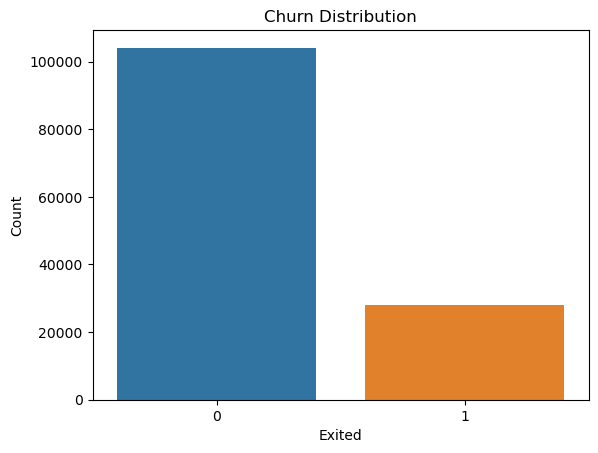

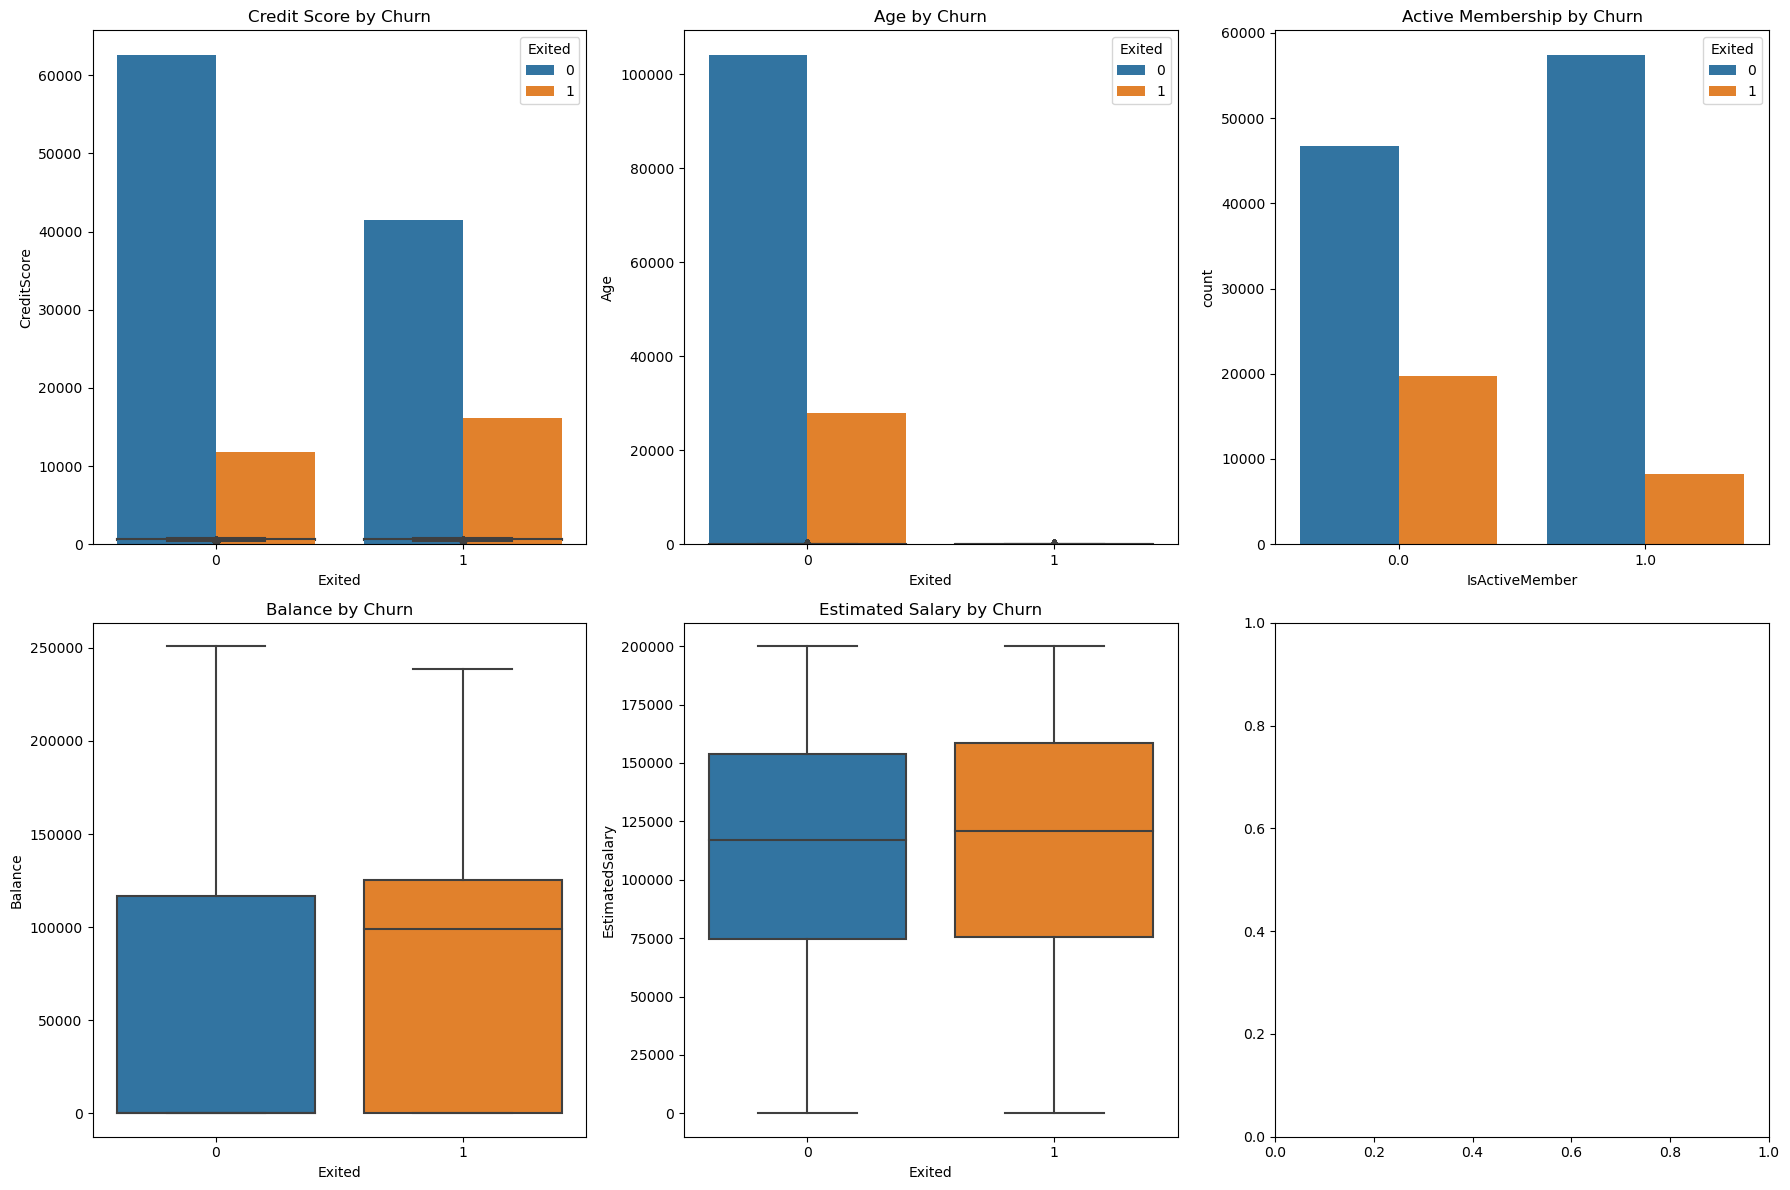

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

##showqing graphs
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# Countplots for Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gender
sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution by Churn')

# HasCrCard
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Credit Card Ownership by Churn')

# IsActiveMember
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Active Membership by Churn')


# Credit Score
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Credit Score by Churn')

# Age
sns.boxplot(x='Exited', y='Age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age by Churn')

# Balance
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Balance by Churn')

# Estimated Salary
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary by Churn')

plt.tight_layout()
plt.show()



## 3. **Feature Engineering**: Generate new features if necessary and select appropriate features for building the model.

In [ ]:
##no need new features, didint get the task 

## 4. **Model Building**: Train at least two different classifiers to predict customer churn.

In [58]:
##building 2 models randomforest and decsisiontree and fitting them together
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. **Model Evaluation**: Evaluate your models using accuracy, precision, recall and F1-score.

In [62]:
##making function for evaluation and before makeing predicts for test data. 
##printion results and choosing best model (its random forestr)
from sklearn.metrics import accuracy_score, recall_score, f1_score
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation
def evaluate_model(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    return accuracy, recall, f1

dt_accuracy, dt_recall, dt_f1 = evaluate_model(y_test, dt_preds)
rf_accuracy, rf_recall, rf_f1 = evaluate_model(y_test, rf_preds)
print(f"Decision Tree - Accuracy: {dt_accuracy}, Recall: {dt_recall}, F1 Score: {dt_f1}")
print(f"Random Forest - Accuracy: {rf_accuracy}, Recall: {rf_recall}, F1 Score: {rf_f1}")


Decision Tree - Accuracy: 0.7901594636566797, Recall: 0.5214119333452786, F1 Score: 0.5123239436619719
Random Forest - Accuracy: 0.8526570963221091, Recall: 0.5115570686256943, F1 Score: 0.5947916666666667


## 6. **Model Selection**: Compare the performance of the models and select the best one based on the evaluation metrics.

In [79]:
##Preparing test data asme as i dii with train one 
test_df = pd.read_csv('test.csv')
test_df = test_df.drop(columns=['CustomerId', 'Surname', 'Geography','id'])

numerical_cols=['CreditScore','Age','Balance','EstimatedSalary']
categorical_cols=['Gender','HasCrCard','IsActiveMember','Tenure','NumOfProducts']



In [71]:
def fill_missing_values(df: pd.DataFrame, strategy: str ='mean') -> pd.DataFrame:
    """Заполнение пустых значений указанными стратегиями"""
    df = df.copy()
    fill_value = 0
    for column in df.columns:
        if strategy == 'mean':
            fill_value = df[column].mean()
        elif strategy == 'median':
            fill_value = df[column].median()
        elif strategy == 'mode':
            fill_value = df[column].mode()[0]
        df[column].fillna( value = fill_value, inplace=True )
    return df


def one_hot_encoder(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Категорийные данные в численные"""
    df = df.copy()
    df_num = df.drop(columns = columns)
    df = df[columns].copy()
    df_prep = pd.DataFrame()
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) <= 2:
            df_prep[column] = df[column]
            for i in range(len(unique_values)):
                df_prep[column] = df_prep[column].replace({unique_values[i]: i})
        else:
            dummies = pd.get_dummies( df[column], prefix=column )
            df_prep = pd.concat([df_prep, dummies], axis=1)
    return pd.concat([df_num, df_prep], axis=1)

In [72]:
# Preprocess test data
test_df[numerical_cols] = fill_missing_values(test_df[numerical_cols])
test_df[categorical_cols] = fill_missing_values(test_df[categorical_cols], strategy='mode')
test_df = one_hot_encoder(test_df, categorical_cols)

In [73]:
test_df
#making sure

,CreditScore,Age,Balance,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Tenure_0,Tenure_1,Tenure_2,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,693,41.0,181461.48,187929.43,0,1.0,1.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,537,38.0,122214.00,88965.46,1,1.0,1.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,445,28.0,0.00,180134.88,1,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,743,38.0,145843.47,56794.02,0,1.0,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,695,58.0,0.00,102763.69,0,1.0,1.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33028,667,33.0,0.00,131834.75,0,1.0,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
33029,792,35.0,0.00,131834.45,1,1.0,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33030,565,31.0,0.00,127429.56,1,1.0,1.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
33031,554,30.0,161533.00,71173.03,0,1.0,1.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


[1 0 0 ... 0 0 0]


## 7. Making Predictions: Using best model make a predictions on test data.

In [ ]:
##Making Predictions using random forest and dawnloading csv
final_model = rf_model 
test_preds = final_model.predict(test_df)
print(test_preds)

## 8. What is the main reason of customer churn? How to analyze this?

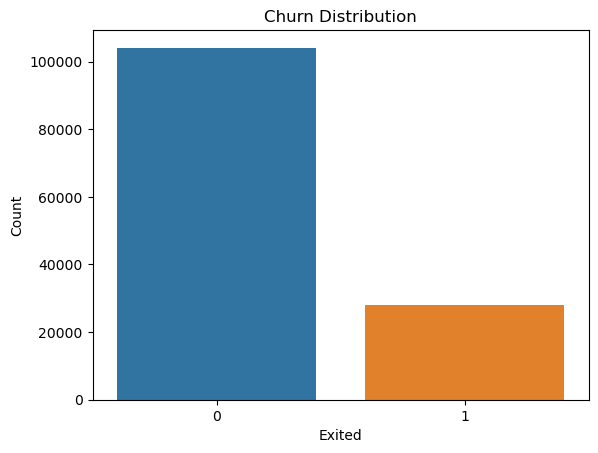

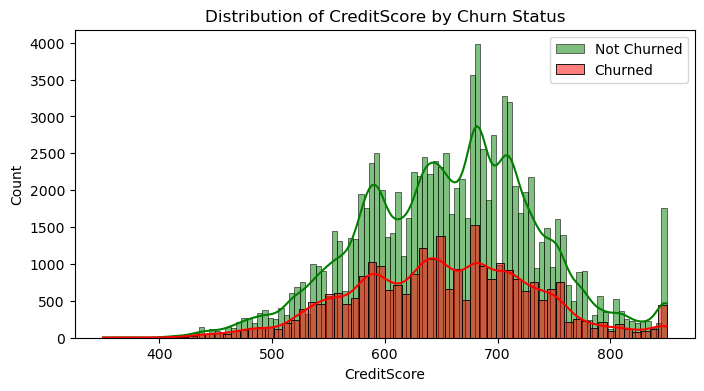

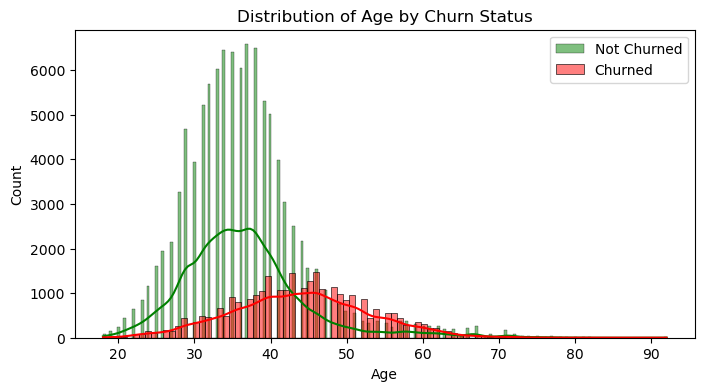

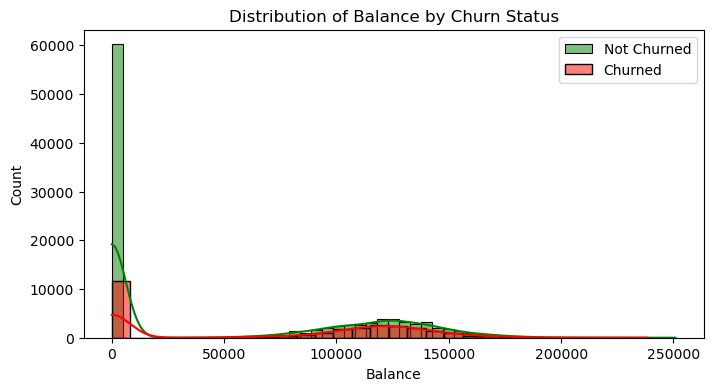

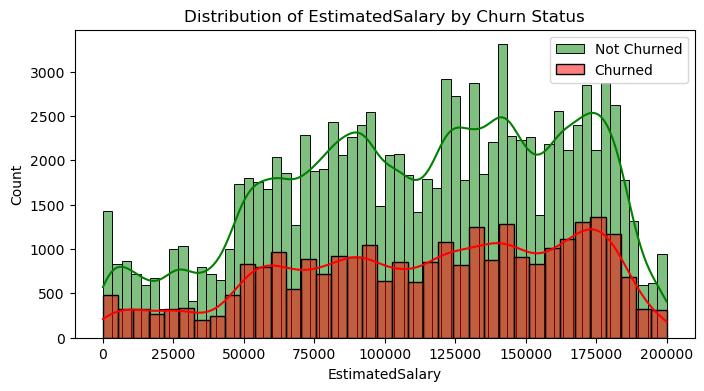

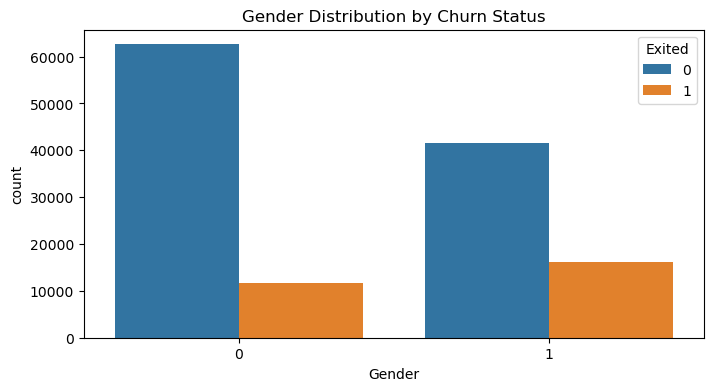

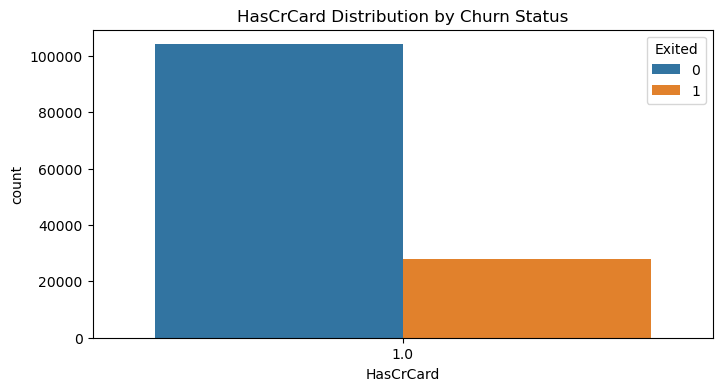

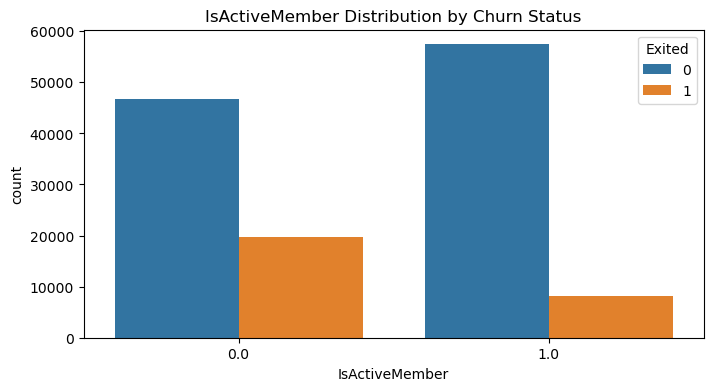

ValueError: Could not interpret input 'Tenure'

<Figure size 800x400 with 0 Axes>

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
#idk
# Distribution of churn
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# Univariate analysis for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['Exited'] == 0][col], kde=True, color='green', label='Not Churned')
    sns.histplot(df[df['Exited'] == 1][col], kde=True, color='red', label='Churned')
    plt.title(f'Distribution of {col} by Churn Status')
    plt.legend()
    plt.show()

# Univariate analysis for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()


In [78]:
df_predictions = pd.DataFrame({
    'my_pred': test_preds
})
df_predictions.to_csv('ALMAZ AKZHOLTEV PRED.csv', index=False)